In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import scienceplots



local_sparc = r'c:\Users\Enenon\Downloads\MassModels_Lelli2016c.mrt.txt'
local_cdr = r'C:\Users\Enenon\Documents\GitHub\Galaxy-Simulation\gui\data\curvas de rotacao'
local_plot = r'C:\Users\Enenon\Documents\GitHub\Galaxy-Simulation\gui\plots'

def ler_SPARC(file,galaxy_name):
    c = open(file).read()
    data = []
    for i in c.split('\n')[25:]:
        if len(i) > 0:
            data.append(i.split())
    
    galaxy = np.array([[float(j) for j in i[1:]] for i in data if i[0] == galaxy_name])

    return np.array(galaxy)

def ler_curva(file,rlimit=None):
    c = open(file).read()
    data = []
    for i in c.split('\n')[1:]:
        if len(i) > 0:
            if rlimit is not None:
                if float(i.split()[0]) > rlimit:
                    continue
            data.append(i.split())
    
    curva = np.array(data).astype(float)


    return curva

plt.style.use(["science","no-latex"])

In [2]:
c1 = ler_SPARC(local_sparc,'UGC11455')
c2 = ler_curva(local_cdr + r'\sem halo.txt',rlimit=43)
c3 = ler_curva(local_cdr + r'\com halo.txt',rlimit=43)
c4 = ler_curva(local_cdr + r'\somente halo.txt',rlimit=43)
l = ler_curva(local_plot + r'\velxraio_0.txt',rlimit=43)

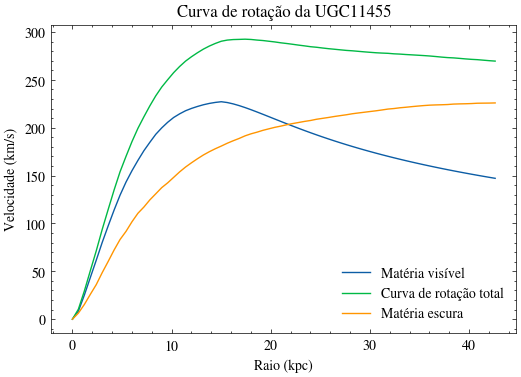

In [6]:
pparam = dict(xlabel="Raio (kpc)", ylabel=r"Velocidade (km/s)", title="Curva de rotação da UGC11455")
with plt.style.context(["science","no-latex"]):
    fig, ax = plt.subplots()

    plt.plot(c2[:,0],c2[:,1],label='Matéria visível')
    plt.plot(c3[:,0],c3[:,1],label='Curva de rotação total')
    plt.plot(c4[:,0],c4[:,1],label='Matéria escura')
    ax.legend()
    #ax.autoscale(tight=True)
    ax.set(**pparam)
    ax.figure.set_size_inches(6,4)

    plt.show()
    #fig.savefig("figures/fig01a.jpg", dpi=300)
    #plt.close()

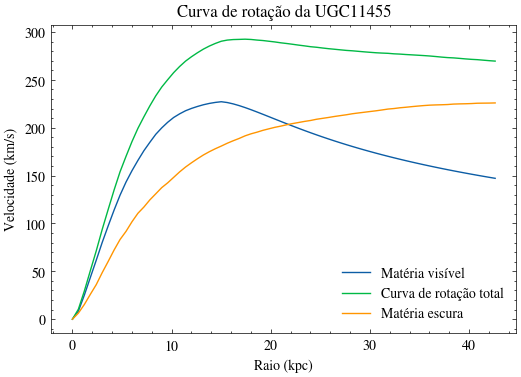

In [17]:
plt.clf()
plt.plot(c2[:,0],c2[:,1],label='Matéria visível')
plt.plot(c3[:,0],c3[:,1],label='Curva de rotação total')
plt.plot(c4[:,0],c4[:,1],label='Matéria escura')
plt.legend()
plt.title('Curva de rotação da UGC11455')
plt.xlabel('Raio (kpc)')
plt.ylabel('Velocidade (km/s)')
plt.gcf().set_size_inches(6,4)
plt.show()

In [ ]:
plt.clf()
plt.plot(c1[:,1],c1[:,5]*0.7)
plt.scatter(c1[:,1],c1[:,2],s=4,c='black')
plt.plot(c2[:,0],c2[:,1])
#plt.scatter(l[:,0],l[:,1],s=2)
plt.scatter(c3[:,0],c3[:,1],s=4,c='purple')
plt.legend(['SPARC - contribuição do disco (M/L=0.7)','SPARC - velocidade observada','Simulação sem halo','Simulação com halo'])
plt.gcf().set_size_inches(6,4)
plt.show()

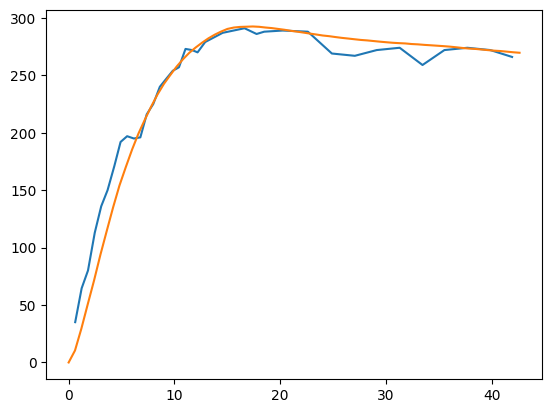

In [13]:
plt.plot(c1[:,1],c1[:,2])
plt.plot(c3[:,0],c3[:,1])

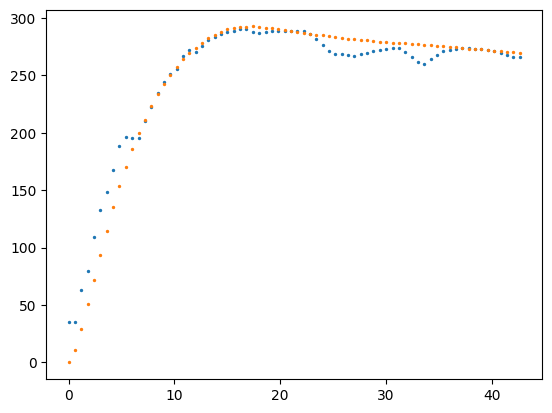

13.75350990636815


In [34]:
c1_interp = np.interp(c3[:,0],c1[:,1],c1[:,2])

plt.scatter(c3[:,0],c1_interp,s=2)
plt.scatter(c3[:,0],c3[:,1],s=2)
plt.show()

mse = np.sqrt(np.square(c3[:,1] - c1_interp).mean(axis=None))
print(mse)